In [32]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import Metaheuristics as metah
import plot_tsp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#inputs
rand_Dist_File = 'TSP_Rand_25_dist.csv'
rand_Coords_File = 'TSP_Rand_25_coords.csv'

circ_Dist_File = 'TSP_Circle_50_dist.csv'
circ_Coords_File = 'TSP_Circle_50_coords.csv'

# VNS, LS, SA
count_limit = 50000 #max number of iterationsbefore stopping (stopping condition)
fail_limit = 1000 # number of times a neighborhood can fail the generate a better solution before changing neigborhoods
Temp = 100 #temperature value for Simulated annealing

#GA
count_limit2 = 1000 #max number of iterations before stopping (stopping condition)
num_chromosomes = 50 #population size in GA - must be an even number

# PS
num_particles = 50 #number of points in particle swarm
weights = np.array([1,1,1]) #weights are w, c1 and c2
count_limit3 = 1000 #max number of iterations before stopping (stopping condition)

#load data
D_rand = np.genfromtxt(rand_Dist_File, delimiter=',')
D_circ = np.genfromtxt(circ_Dist_File, delimiter=',')
#inital tour is starting at city 0 and moving to city 1, city 1 to city 2 and so on
rand_initial_tour = np.arange(D_rand.shape[0],dtype=int)
rand_initial_tour = np.random.permutation(rand_initial_tour)

circ_initial_tour = np.arange(D_circ.shape[0],dtype=int)
circ_initial_tour = np.random.permutation(circ_initial_tour)

# Greedy Search (Lower bound estimation)

estimated lower bound 917.8820971672781


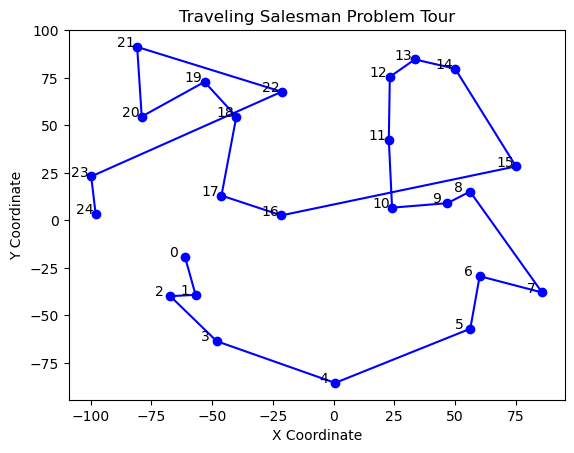

estimated lower bound 615.3470913872713


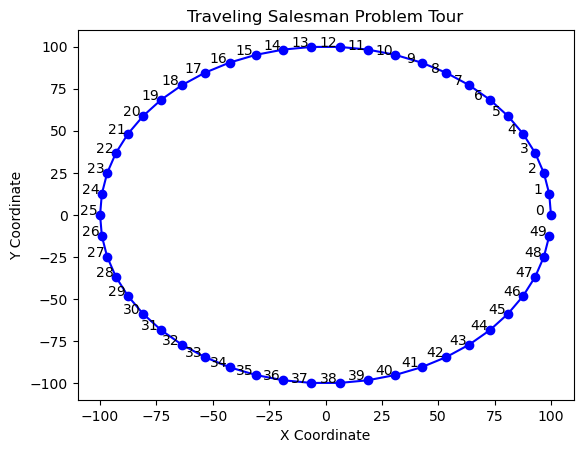

In [34]:
est, v= metah.EstimateLowerBound(D_rand)
print('estimated lower bound',v)
plot_tsp.plot_tsp_solution(rand_Coords_File,est)

est, v= metah.EstimateLowerBound(D_circ)
print('estimated lower bound',v)
plot_tsp.plot_tsp_solution(circ_Coords_File,est)

# Variable Neighborhood Search (VNS)


-----------------------------------------------------------
Variable Neighborhood Search
-----------------------------------------------------------

The inital tour and distance is: 

[11 10 17 21  8 22  7 19 15 13  3  9  4  2 18  1 16 14 23 24  6  0 20  5
 12]
2683.4235194382495

-----------------------------------------------------------

50001 objective evaluations occured 

The final tour and distance for Variable Neighborhood Search is: 

[12  6  2 16  8  9  4 21 15 11 19  5 14  3 22 10 24 20 18  7  0 17 23 13
  1]
745.6851143503

-----------------------------------------------------------



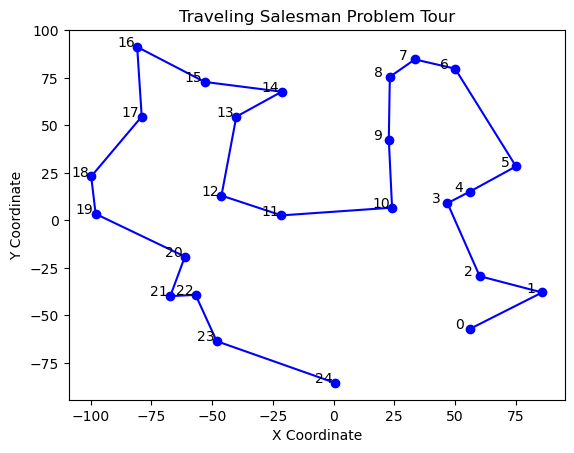

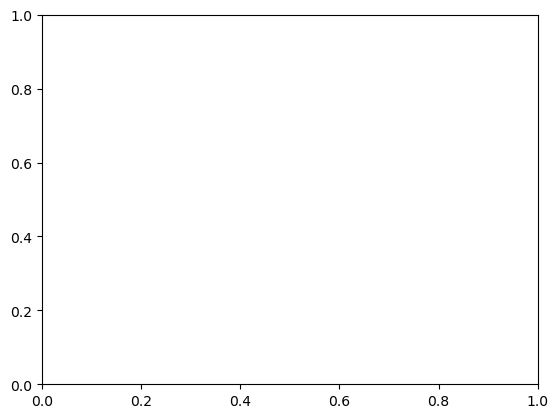

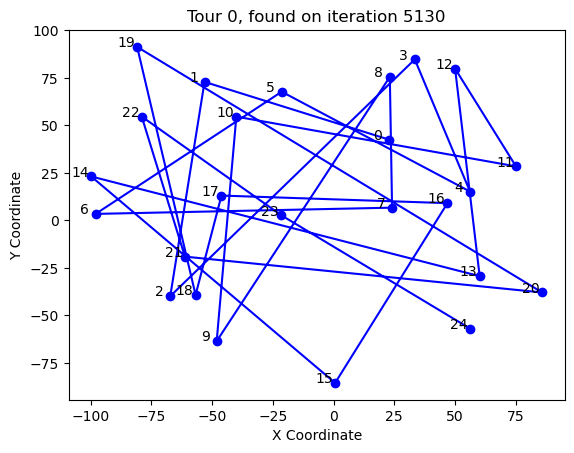

In [35]:
# rand VNS
best_tour, best_solution, [best_tours, itrs] = metah.Variable_Neighborhood_Search(D_rand,rand_initial_tour,fail_limit, count_limit)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)

plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_VNS25_rand.mp4')



-----------------------------------------------------------
Variable Neighborhood Search
-----------------------------------------------------------

The inital tour and distance is: 

[41 31 10 49 18 48 29 38 37  4  6 26 42 44 32  2 14 19 45 20  8 23 28  1
 36 35 40  0 30 15 34 11 21 16 33  5 22  3  7 47 25 12 43 39 24 27 46 13
 17  9]
6643.688654060939

-----------------------------------------------------------

50001 objective evaluations occured 

The final tour and distance for Variable Neighborhood Search is: 

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]
615.3470913872708

-----------------------------------------------------------



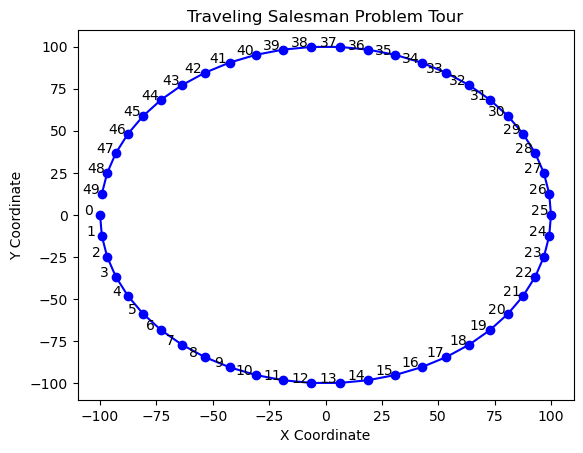

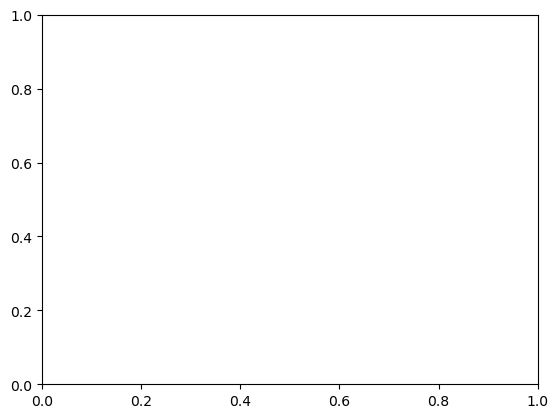

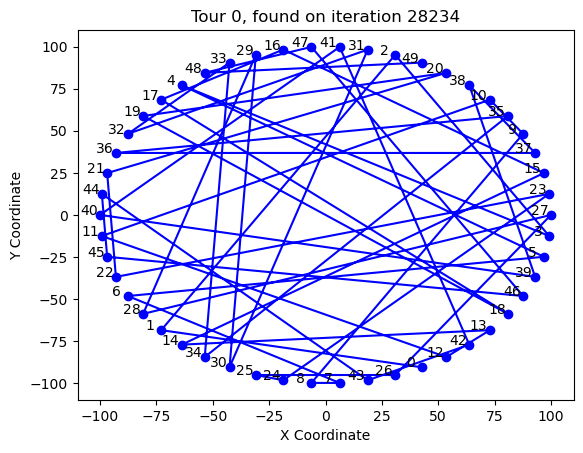

In [36]:
# circle VNS
best_tour, best_solution, [best_tours, itrs] = metah.Variable_Neighborhood_Search(D_circ,circ_initial_tour,fail_limit, count_limit)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)

plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_VNS50_circ.mp4')



# Genetic Algorithm (GA)


-----------------------------------------------------------

Genetic Algorithm

-----------------------------------------------------------

1000 iterations were performed

With population size of 50

The final tour for GA is: 

[ 0. 14.  5. 23. 17. 13.  1. 12.  6.  2.  9.  8. 16. 19. 11.  4. 21. 15.
 22.  3. 10. 24. 20.  7. 18.]
The final distance for GA is: 800.9174584142147



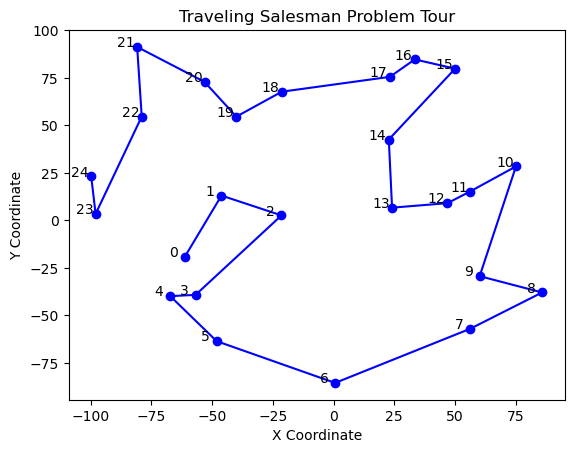

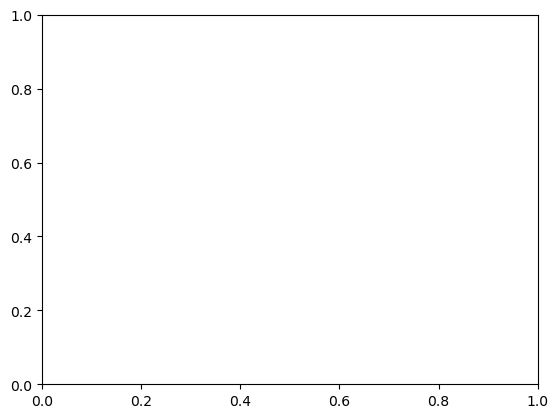

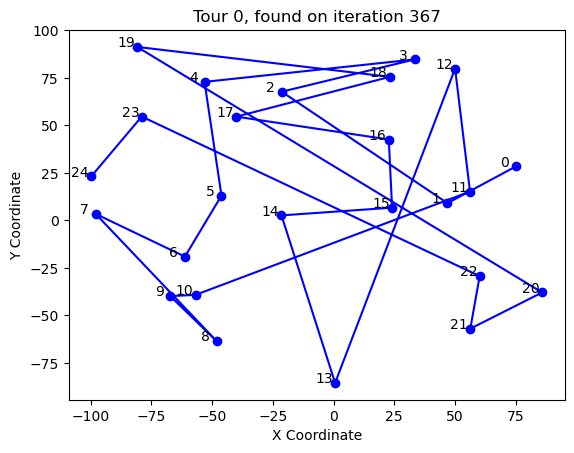

In [37]:
# rand GA
best_tour, best_solution, [best_tours, itrs] = metah.GA(D_rand,count_limit2, num_chromosomes)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_GA25_circ.mp4')


-----------------------------------------------------------

Genetic Algorithm

-----------------------------------------------------------

1000 iterations were performed

With population size of 50

The final tour for GA is: 

[ 6.  5.  4.  3.  2.  1.  0. 49. 48. 47. 46. 42. 41. 43. 44. 45.  7.  8.
  9. 10. 11. 12. 13. 16. 17. 15. 14. 18. 19. 23. 24. 22. 21. 20. 25. 26.
 27. 28. 29. 30. 31. 33. 32. 35. 36. 37. 40. 39. 38. 34.]
The final distance for GA is: 1062.4518460065458



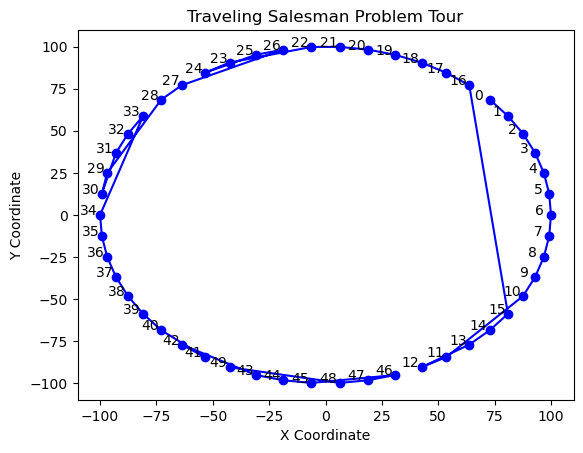

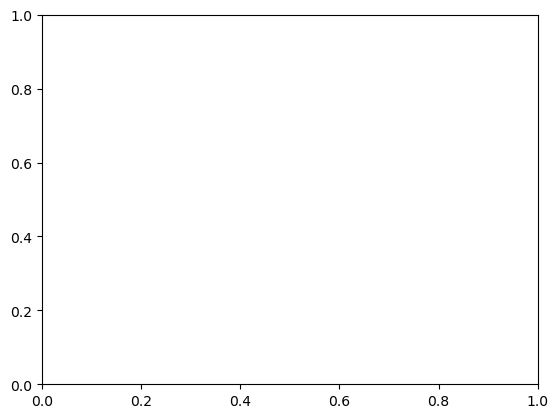

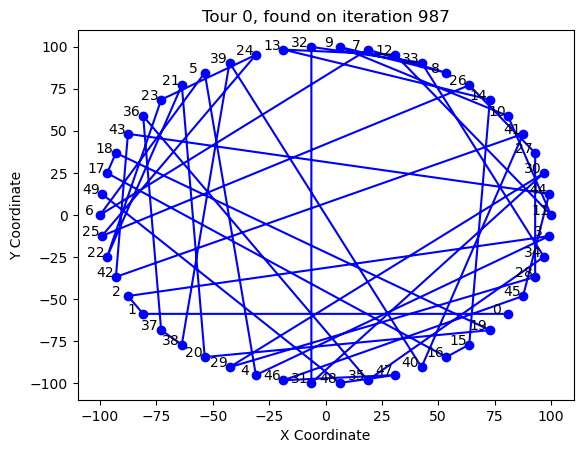

In [38]:
# circ GA
best_tour, best_solution, [best_tours, itrs] = metah.GA(D_circ,count_limit2, num_chromosomes)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_GA50_circ.mp4')

# Simulated Annealing (SA)


-----------------------------------------------------------
Simulated Annealing
-----------------------------------------------------------

The inital tour and distance is: 

[11 10 17 21  8 22  7 19 15 13  3  9  4  2 18  1 16 14 23 24  6  0 20  5
 12]
2683.4235194382495

-----------------------------------------------------------

The final tour for Simulated Annealing is: 

[ 4 11 10 17  2  6  1  8 16 14 19  9 22 21 15 12 20 24  3  5  0 23 13 18
  7]
The final distance for Simulated Annealing is: 1685.347282098777


------------------------------------------------------------------



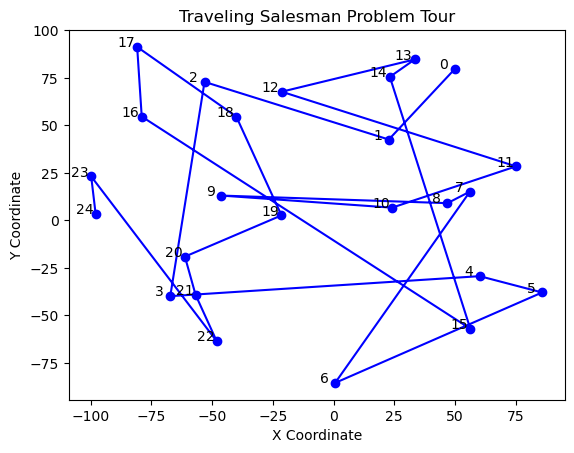

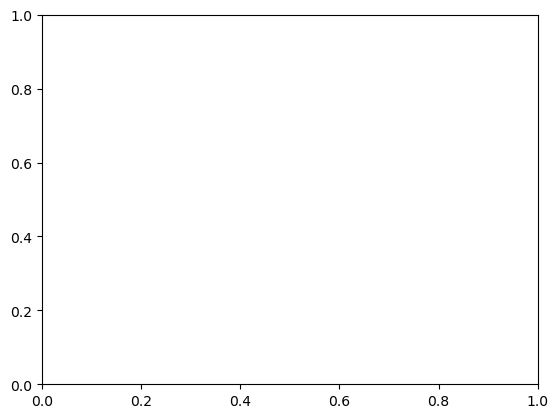

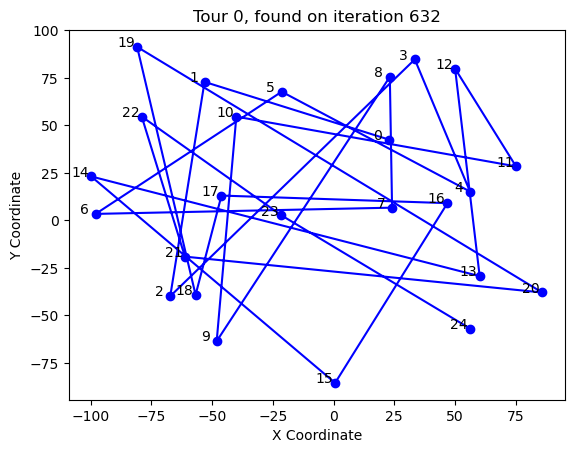

In [39]:
# rand SA
best_tour, best_solution, [best_tours, itrs] = metah.Simulated_Annealing(D_rand,rand_initial_tour, count_limit,Temp)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_SA25_circ.mp4')


-----------------------------------------------------------
Simulated Annealing
-----------------------------------------------------------

The inital tour and distance is: 

[41 31 10 49 18 48 29 38 37  4  6 26 42 44 32  2 14 19 45 20  8 23 28  1
 36 35 40  0 30 15 34 11 21 16 33  5 22  3  7 47 25 12 43 39 24 27 46 13
 17  9]
6643.688654060939

-----------------------------------------------------------

The final tour for Simulated Annealing is: 

[ 1 47  6  2  5 14 21 22 24 32 43 20 16 39 41 42  3 12  7 31 23 30 11 15
 35 28 18 10  8  9 17 27 38 34 40 36 44  4 13 19 26 48  0 49 29 25 46 33
 45 37]
The final distance for Simulated Annealing is: 4663.415509702348


------------------------------------------------------------------



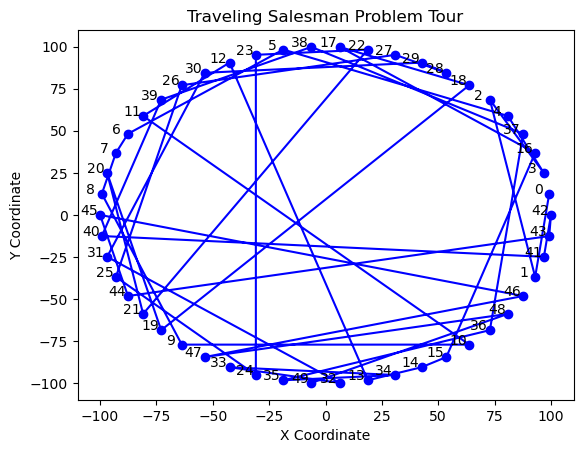

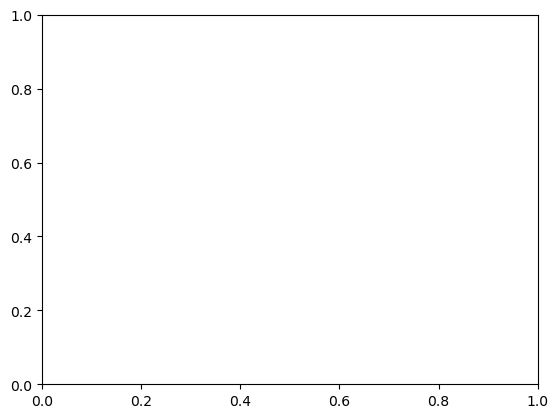

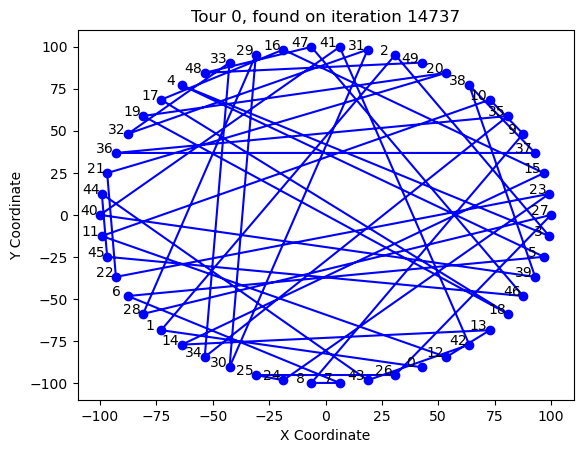

In [40]:
# circ SA
best_tour, best_solution, [best_tours, itrs] = metah.Simulated_Annealing(D_circ,circ_initial_tour, count_limit,Temp)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_SA50_circ.mp4')

# Local Search (LS)


-----------------------------------------------------------
Local Search
-----------------------------------------------------------

The inital tour and distance is: 

[11 10 17 21  8 22  7 19 15 13  3  9  4  2 18  1 16 14 23 24  6  0 20  5
 12]
2683.4235194382495

-----------------------------------------------------------

The final tour for local search is: 

[14  5 19 11 22  3 10 24 15 21  4  9  8 16 20 18  7  0 17 23 13  1 12  2
  6]
The final tour distance for local search is: 928.7153289260027


-----------------------------------------------------------



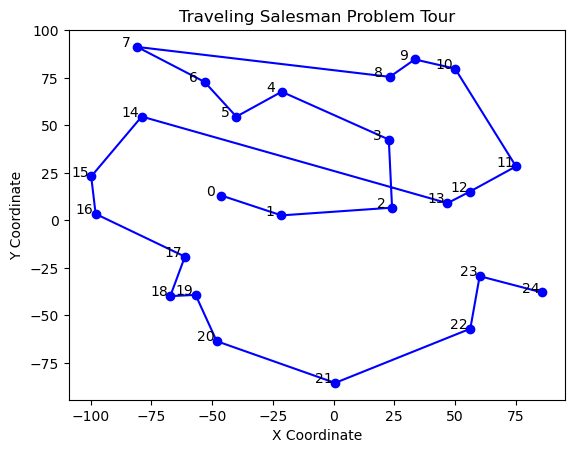

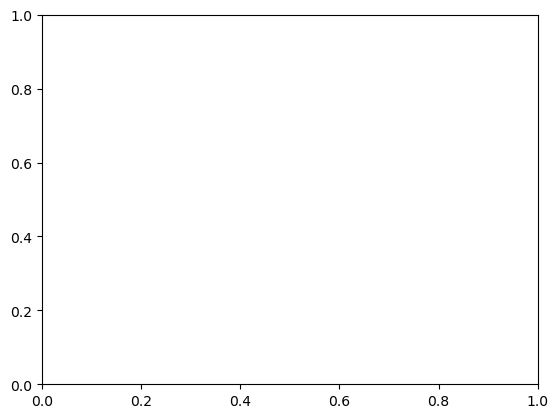

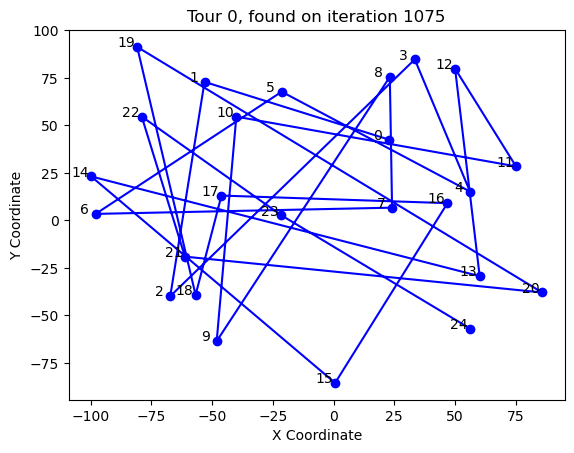

In [41]:
# rand LS
best_tour, best_solution, [best_tours, itrs] = metah.Local_Search(D_rand,rand_initial_tour, count_limit)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_LS25_circ.mp4')


-----------------------------------------------------------
Local Search
-----------------------------------------------------------

The inital tour and distance is: 

[41 31 10 49 18 48 29 38 37  4  6 26 42 44 32  2 14 19 45 20  8 23 28  1
 36 35 40  0 30 15 34 11 21 16 33  5 22  3  7 47 25 12 43 39 24 27 46 13
 17  9]
6643.688654060939

-----------------------------------------------------------

The final tour for local search is: 

[20 19 18 17  3  2  1  0 49 48 47 46 45 44 43 42 13 14 15 16 21 22 23 30
 29 28 27 26 25 24 12 11 10  9  8  7  6  5  4 41 40 39 38 37 36 35 34 33
 32 31]
The final tour distance for local search is: 1317.4801525910034


-----------------------------------------------------------



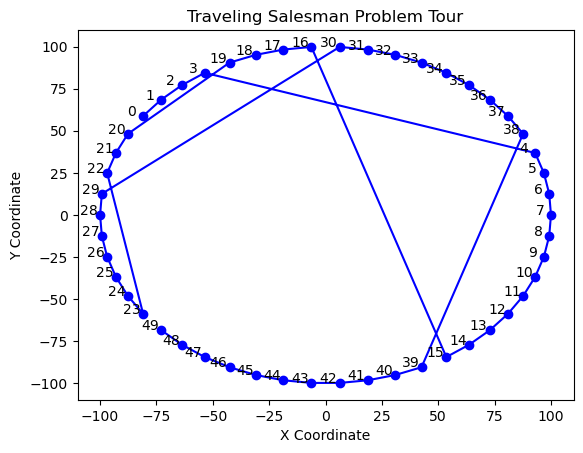

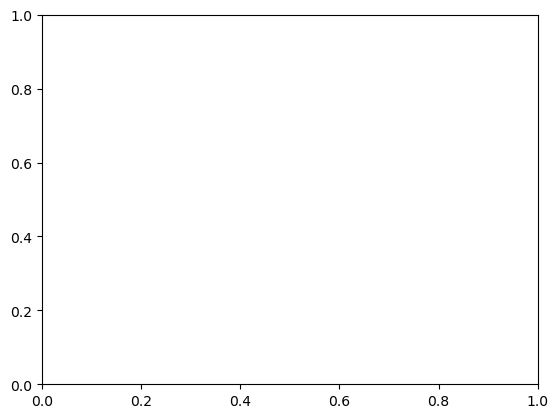

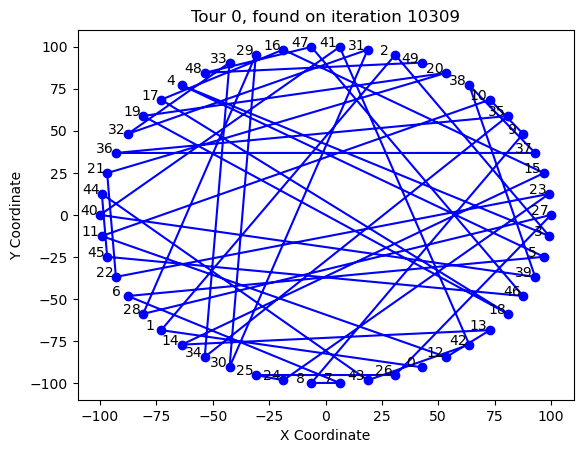

In [42]:
# circ LS
best_tour, best_solution, [best_tours, itrs] = metah.Local_Search(D_circ,circ_initial_tour, count_limit)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_LS50_circ.mp4')

# Particle Swarm (PS)


-----------------------------------------------------------
Particle Swarm
-----------------------------------------------------------

The inital tour and distance is: 

[11 10 17 21  8 22  7 19 15 13  3  9  4  2 18  1 16 14 23 24  6  0 20  5
 12]
2683.4235194382495

-----------------------------------------------------------



c:\Users\jgwest\Documents\Git Projects\TSP_Metaheuristics\TSP_Metaheuristics\Proj5.py:139: RuntimeWarning: invalid value encountered in cast
  def Update_Velocity(weights,Particles,Velocity,Global_Best_Paticle,Current_Particle_Best):


1000 iterations were performed

With 50 number of particles

The final tour and distance for Particle Swarm is: 

[18  7 13 23 17  8  9 16 11 21 22  5 14  3 10 20 15 19  6  2 12  1  0 24
  4]
1362.9672680601877

-----------------------------------------------------------



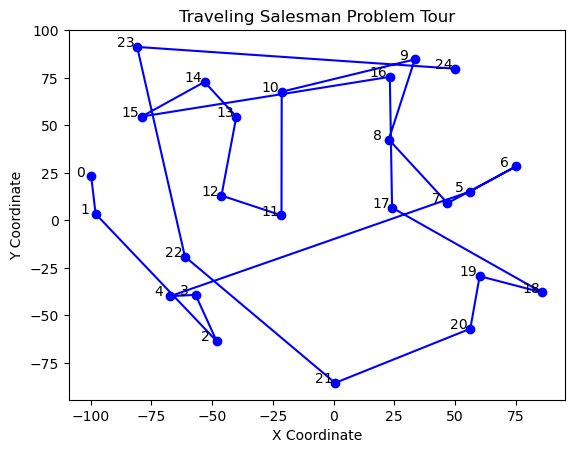

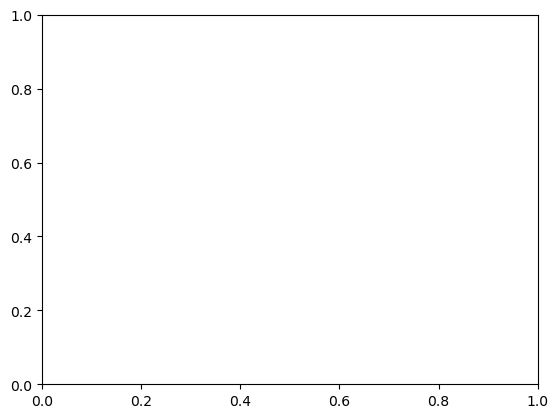

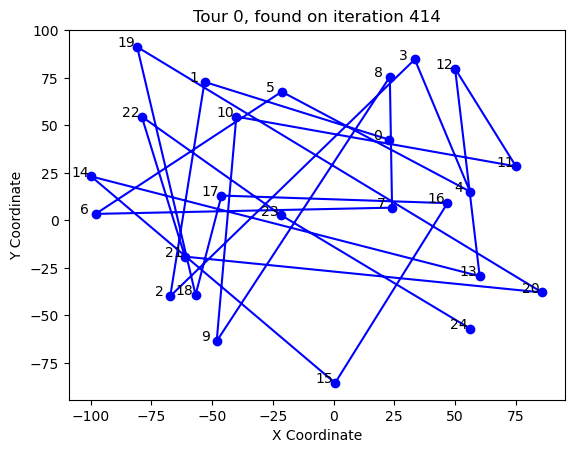

In [43]:
# rand PS
best_tour, best_solution, [best_tours, itrs] = metah.Particle_Swarm(D_rand,count_limit3, weights, num_particles,rand_initial_tour)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_PS25_circ.mp4')


-----------------------------------------------------------
Particle Swarm
-----------------------------------------------------------

The inital tour and distance is: 

[41 31 10 49 18 48 29 38 37  4  6 26 42 44 32  2 14 19 45 20  8 23 28  1
 36 35 40  0 30 15 34 11 21 16 33  5 22  3  7 47 25 12 43 39 24 27 46 13
 17  9]
6643.688654060939

-----------------------------------------------------------



c:\Users\jgwest\Documents\Git Projects\TSP_Metaheuristics\TSP_Metaheuristics\Proj5.py:139: RuntimeWarning: invalid value encountered in cast
  def Update_Velocity(weights,Particles,Velocity,Global_Best_Paticle,Current_Particle_Best):


1000 iterations were performed

With 50 number of particles

The final tour and distance for Particle Swarm is: 

[38 22 14  9 13 19 10 15  7 37 35  0  1 46 47 43 31 26 29 48  4  8  6  3
 12 16 18 27 30 44 41 39 40 45 23 25 24 34 33 36 42 49 11  2 20 21 17  5
 28 32]
3887.9708739904586

-----------------------------------------------------------



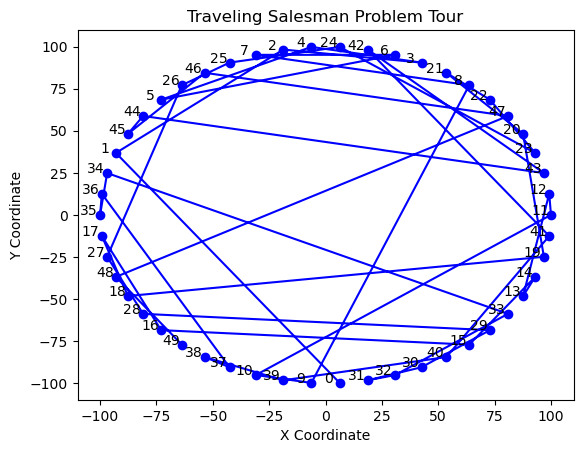

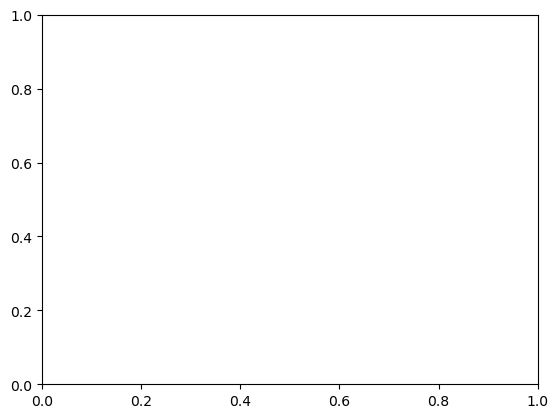

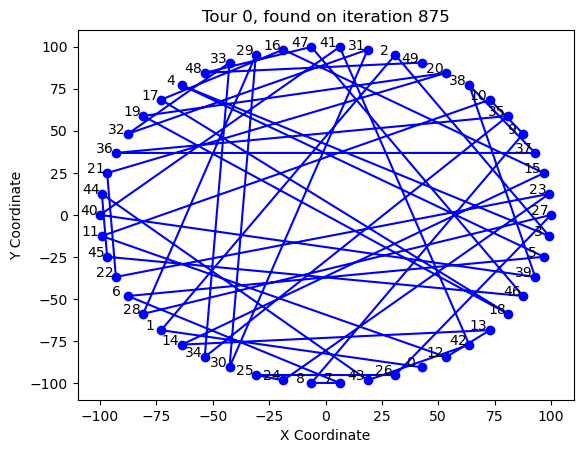

In [44]:
# circ PS
best_tour, best_solution, [best_tours, itrs] = metah.Particle_Swarm(D_circ,count_limit3, weights, num_particles,circ_initial_tour)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_PS50_circ.mp4')